**Bike Network Data Analysis**

This notebook is used to perform basic analysis of both the bike network and wider underlying street network. It requires the prior notebook (00-bike-network-data-collection.ipynb) to have been run to collect the street networks from OpennStreetMap.

In [128]:
# libary imports
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import os
import networkx as nx


# get working directory
working_directory =  os.getcwd()

In [122]:
# get street networks

bike_network = ox.io.load_graphml(working_directory + "\data\\bike_network.xml")

road_network =  ox.io.load_graphml(working_directory + "\data\\road_network.xml")


In [123]:
# convert graphs to gdfs

bike_network_edges = ox.utils_graph.graph_to_gdfs(bike_network, nodes=False)

road_network_edges = ox.utils_graph.graph_to_gdfs(road_network, nodes=False)

In [124]:
# calculate lenghts of streets

bike_length = (bike_network_edges['length'].sum())* 0.0001 # convert to km

road_length = (road_network_edges['length'].sum())* 0.0001 # convert to km


# save to Dataframe

lengths_df = gpd.GeoDataFrame([road_length, bike_length])

row_names = {0:'Road',
            1:'Bike Paths'}

lengths_df = lengths_df.rename(index = row_names)


(array([0, 1]), [Text(0, 0, 'Road'), Text(1, 0, 'Bike Paths')])

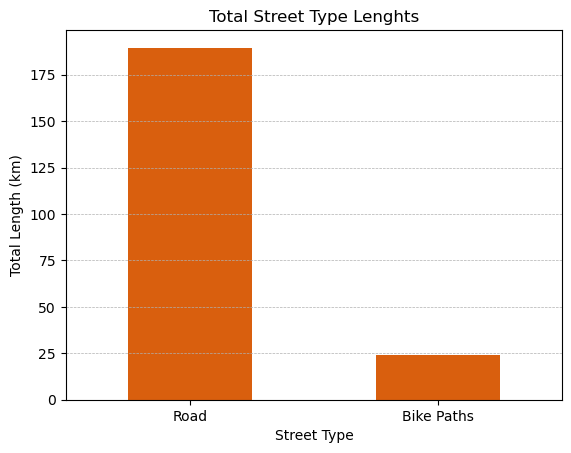

In [125]:
# plot street lenghts

colours = ['#d95f0e', '#fec44f']
ax = lengths_df.plot.bar(color=colours)
ax.set_xlabel("Street Type")
ax.set_ylabel("Total Length (km)")
ax.get_legend().remove()
plt.title("Total Street Type Lenghts")
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=0)

In [126]:
# calculate the ratio of road compared to bike streets

def ratioFunction(input1, input2):
    num1 = input1
    num1 = float(num1) 
    num2 = input2
    num2 = float(num2) 
    ratio12 = float(num1/num2)
    print('The ratio of road network (', num1, 'km) to bike network (', num2,'km) is 1 :', str(ratio12) + '.')
    return(ratio12)

road_to_bike_ratio = ratioFunction(road_length, bike_length)

The ratio of road network ( 189.51392420000005 km) to bike network ( 24.0302862 km) is 1 : 7.886461385549376.


In [136]:
# calculate number of disconnected components

# convert to undirected (number_connnected_components only works with undirected graphs)

bike_network_undirected = ox.utils_graph.get_undirected(bike_network)

bike_components = nx.number_connected_components(bike_network_undirected)

# calculate the mean level of disconnect

mean_level_of_disconnect = bike_components/bike_length

In [137]:
mean_level_of_disconnect

6.283737061774986